In [ ]:
''' IMPORTING PACKAGES '''
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dropout , Dense , Flatten , Conv2D , MaxPooling2D 
from keras.callbacks import EarlyStopping
import os
import random
import cv2
import pandas as pd

In [ ]:
'''DECALARING THE VARS'''
DATADIRTRAIN ="D:/maleria"
data_set = []
IMG_SIZE = 128
x_train = []
y_train = []
x_test = []
y_test = []
CATEGORIES = [c for c in os.listdir(DATADIRTRAIN)]
catlen=len(CATEGORIES)

FileNotFoundError: ignored

In [ ]:
'''TRAIN DATA SET CREATION'''
for category in CATEGORIES:
    path = os.path.join(DATADIRTRAIN, category)
    class_num = CATEGORIES.index(category)
    for img in os.listdir(path):
        try:
            img_array = cv2.imread(os.path.join(path, img))
            new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
            data_set.append([new_array, class_num])
            random.shuffle(data_set)
        except:
            pass


In [ ]:
for features,label in data_set:
    x_train.append(features)
    y_train.append(label)
x_train=np.array(x_train).reshape(-1,IMG_SIZE,IMG_SIZE,3)
x_train=x_train/255        
y_train=np.array(y_train)

In [ ]:
data_set=[]

In [ ]:
model = keras.Sequential()
model.add(Conv2D(128,(3,3),activation='relu',input_shape=(128,128,3)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(256,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(512,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(1024,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dense(124,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(catlen,activation='softmax'))

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
early_stop = EarlyStopping(mode='min',verbose=1,patience=4)nvidia
history = model.fit(x_train,y_train,epochs=10,validation_split=0.1,callbacks=[early_stop])

Epoch 1/10
776/776 [==============================] - 3242s 4s/step - loss: 0.5406 - accuracy: 0.6595 - val_loss: 0.1353 - val_accuracy: 0.9586
Epoch 2/10
776/776 [==============================] - 3027s 4s/step - loss: 0.1517 - accuracy: 0.9546 - val_loss: 0.1419 - val_accuracy: 0.9583
Epoch 3/10
776/776 [==============================] - 2932s 4s/step - loss: 0.1406 - accuracy: 0.9564 - val_loss: 0.1390 - val_accuracy: 0.9561
Epoch 4/10
776/776 [==============================] - 2916s 4s/step - loss: 0.1270 - accuracy: 0.9588 - val_loss: 0.1194 - val_accuracy: 0.9619
Epoch 5/10
776/776 [==============================] - 2821s 4s/step - loss: 0.1194 - accuracy: 0.9596 - val_loss: 0.1122 - val_accuracy: 0.9615
Epoch 6/10
776/776 [==============================] - 2778s 4s/step - loss: 0.1249 - accuracy: 0.9607 - val_loss: 0.1157 - val_accuracy: 0.9637
Epoch 7/10
776/776 [==============================] - 2881s 4s/step - loss: 0.1092 - accuracy: 0.9634 - val_loss: 0.1346 - val_accuracy:

In [ ]:
model.save("maleria_model_1.hdf5")

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 128)     3584      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 128)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 256)       295168    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 256)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 512)       1180160   
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 512)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 1024)      4

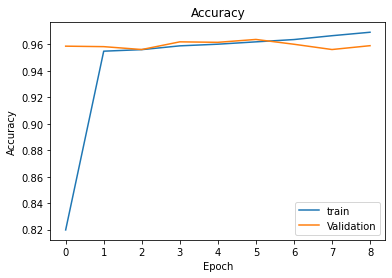

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(["train","Validation"])
plt.show()

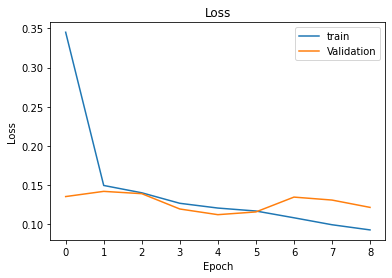

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(["train","Validation"])
plt.show()

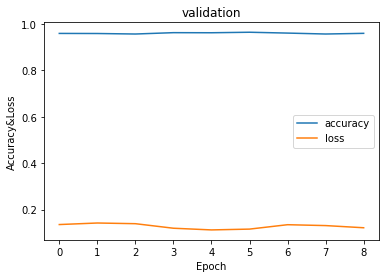

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['val_loss'])
plt.title("validation")
plt.xlabel("Epoch")
plt.ylabel("Accuracy&Loss")
plt.legend(["accuracy","loss"])
plt.show()

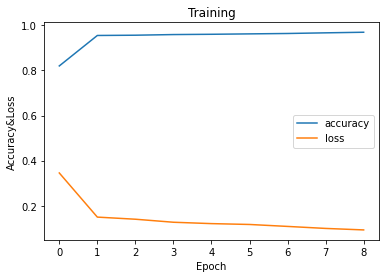

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title("Training")
plt.xlabel("Epoch")
plt.ylabel("Accuracy&Loss")
plt.legend(["accuracy","loss"])
plt.show()